<a href="https://colab.research.google.com/github/JVChaparroUniandes/Taller_1_Ciencia_Datos_Aplicada_Jairo_Chaparro_201531080/blob/main/Taller_1_Ciencia_de_Datos_Aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#**Taller 1 Ciencia de Datos Aplicada:  Inversiones inmobiliarias para alquiler vacacional**
---
Jairo Vladimir Chaparro 201531080




## **Contexto del proyecto**
---
Como consultor científico de datos especializado en el sector inmobiliario, el objetivo de este proyecto es ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través de la plataforma Airbnb.

Con la creciente popularidad de este modelo de negocio, es cada vez más difícil hacer buenas elecciones de sectores de la ciudad y tipos de propiedades, entre otro tipo de factores, para lograr una rentabilidad adecuada a lo largo del tiempo la cual puede estar dada en términos de una alta tasa de ocupación y un precio por noche que los usuarios estarían dispuestos a pagar.

En este escenario se realizará el estudio para la ciudad de Barcelona.

##**Configuración de librerías**
---

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [427]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

##**Importación de datos**
---

In [428]:
from pandas.core.generic import sample
#Importamos los archivos disponibles para la ciudad de Barcelona

df_listings_Barcelona=pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2023-06-10/data/listings.csv.gz")

## **Entendimiento inicial de los datos**
---

En esta primera etapa del proyecto se hará una primera aproximación a los datos. la idea es proveer un entendimiento inicial de donde se observen las dimensiones del dataset, los tipos de datos que contiene y el top 5 de los atributos más importantes para el análisis. **Por cada atributo incluya algunos elementos básicos de su
comportamiento o distribución (análisis univariado).**

In [ ]:
# Visualizamos los primeros 5 filas del dataset
df_listings_Barcelona.head()


In [ ]:
#Visualizamos las últimas 5 filas del dataset
df_listings_Barcelona.tail()


In [ ]:
#Observamos las dimensiones del dataset
df_listings_Barcelona.shape

In [ ]:
#Miramos el tipo de variable de cada columna y si los datos están completo o tenemos datos nulos
df_listings_Barcelona.info()

In [ ]:
#Realizamos un conteo de el total de valores nulos en el dataset
df_listings_Barcelona.isna().sum()

###**Análisis de los 5 atributos más importantes**
---
A continuación se encuentra el listado con los 5 atributos que se consideran más importantes para este proyecto. junto a cada atributo encontrarán la descripción de lo que cada atributo representa.

- **number_of_reviews:** El número de reseñas que tiene el alojamiento

- **price:** precio diario en moneda local

- **neighbourhood_cleansed:** El barrio como geocodificado utilizando la latitud y la longitud frente a los barrios definidos por shapefiles digitales abiertos o públicos.

- **room_type:** Los anfitriones en Airbnb ofrecen una gran variedad de alojamientos, que van desde habitaciones compartidas hasta islas privadas. Existen cuatro tipos de espacios: alojamientos enteros, habitaciones privadas, habitaciones de hotel y habitaciones compartidas. En el dataset los encontraremos referenciados de la siguiente manera respectivamente.
 - Entire place
 - Private rooms
 - Hotel rooms
 - Shared rooms

- **accommodates:** La capacidad máxima del alojamiento

Se considera que estos atributos son los más relevantes ya que la información que contienen permite identificar la zona y el tipo de inmueble ideal para el proyecto de inversión en el sector inmobiliario.

A continuación se realizará un análisis univariable de cada uno de estos atributos.

#### **Análisis univariable del atributo "Number of reviews"**

In [437]:
# Se realiza una primera inspección del contenido de la numbers of reviews
df_listings_Barcelona['number_of_reviews'].describe()

count    17230.000000
mean        42.310215
std         83.509961
min          0.000000
25%          1.000000
50%          7.000000
75%         43.000000
max       1751.000000
Name: number_of_reviews, dtype: float64

In [438]:
#Se Revisa si existen valores nulos dentro de esta columna
df_listings_Barcelona['number_of_reviews'].isna().sum()

0

[]

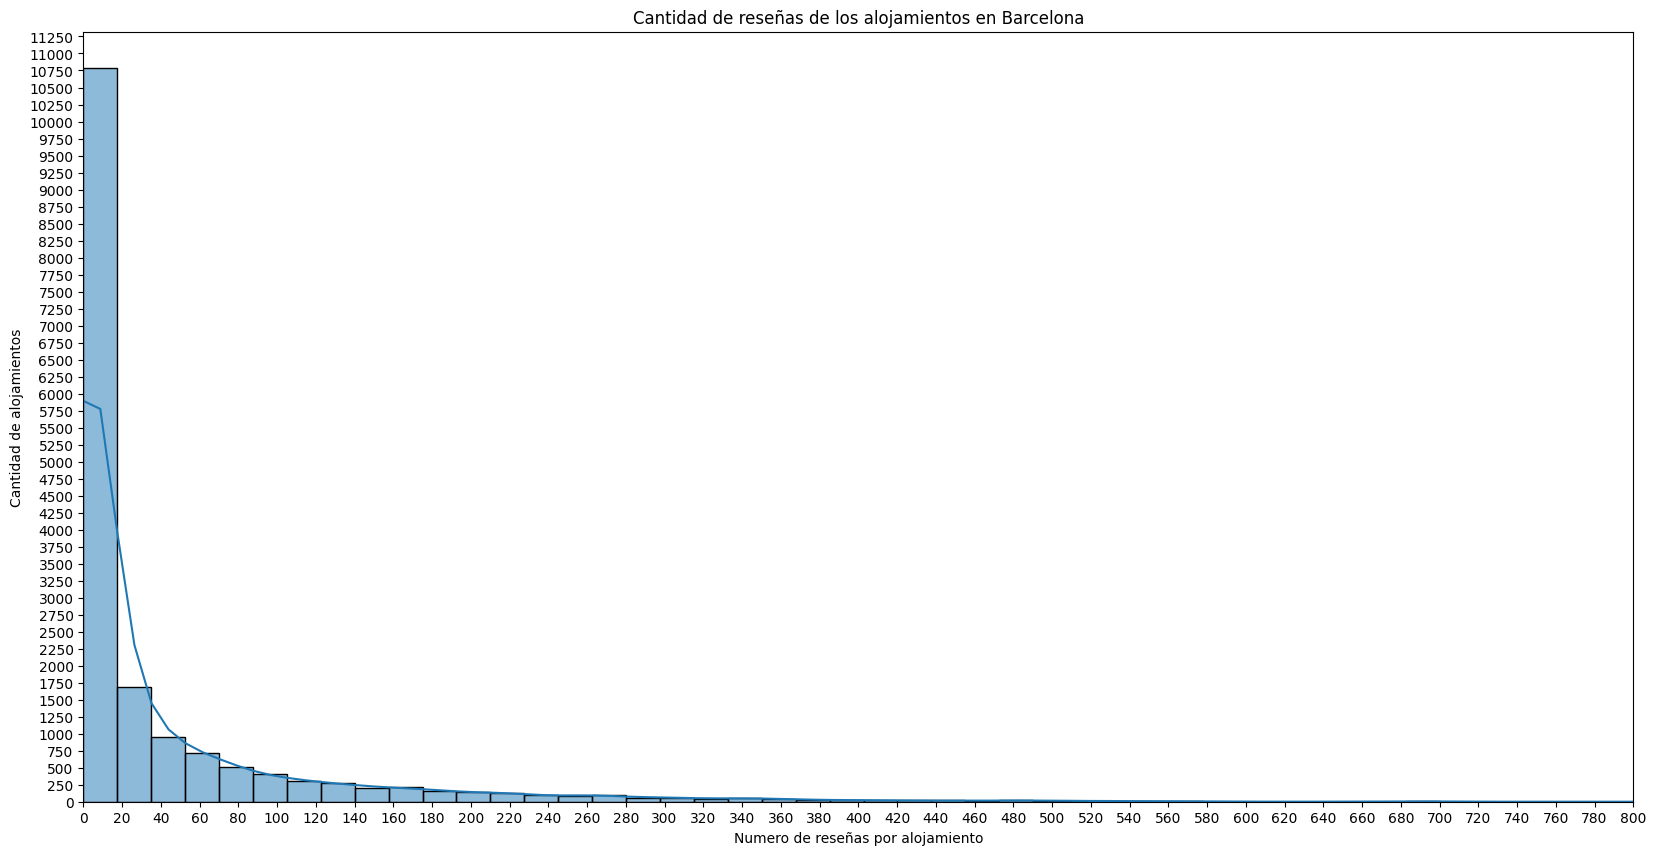

In [439]:
# Creamos un histograma que nos permita ver la distribución de la cantidad de reseñas que han recibido inmuebles en la ciudad de Barcelona
plt.figure(figsize=(20, 10))
sns.histplot(df_listings_Barcelona['number_of_reviews'],bins=100,kde=True)
plt.locator_params(nbins=50)
plt.title("Cantidad de reseñas de los alojamientos en Barcelona")
plt.ylabel('Cantidad de alojamientos')
plt.xlabel('Numero de reseñas por alojamiento')
plt.xlim(0,800)
plt.plot()

#### **Análisis univariable del atirbuto "price"**

In [440]:
# Se revisa que no se tengan valores nulos
df_listings_Barcelona['price'].isna().sum()

0

In [441]:
#Se elimina el signo pesos de la columna price y se convierte el string resultante en un float. Este valor resultante se almacena en una nueva columna llamada "Price_float"
df_listings_Barcelona['price_float']=df_listings_Barcelona['price']=df_listings_Barcelona['price'].str.replace("[$,]", "", regex=True).astype(float)

#Se obtiene la descripción inicial de los datos de la columna price
df_listings_Barcelona['price_float'].describe()

count    17230.000000
mean       177.689959
std        876.724391
min          0.000000
25%         55.000000
50%        111.000000
75%        214.000000
max      90000.000000
Name: price_float, dtype: float64

[]

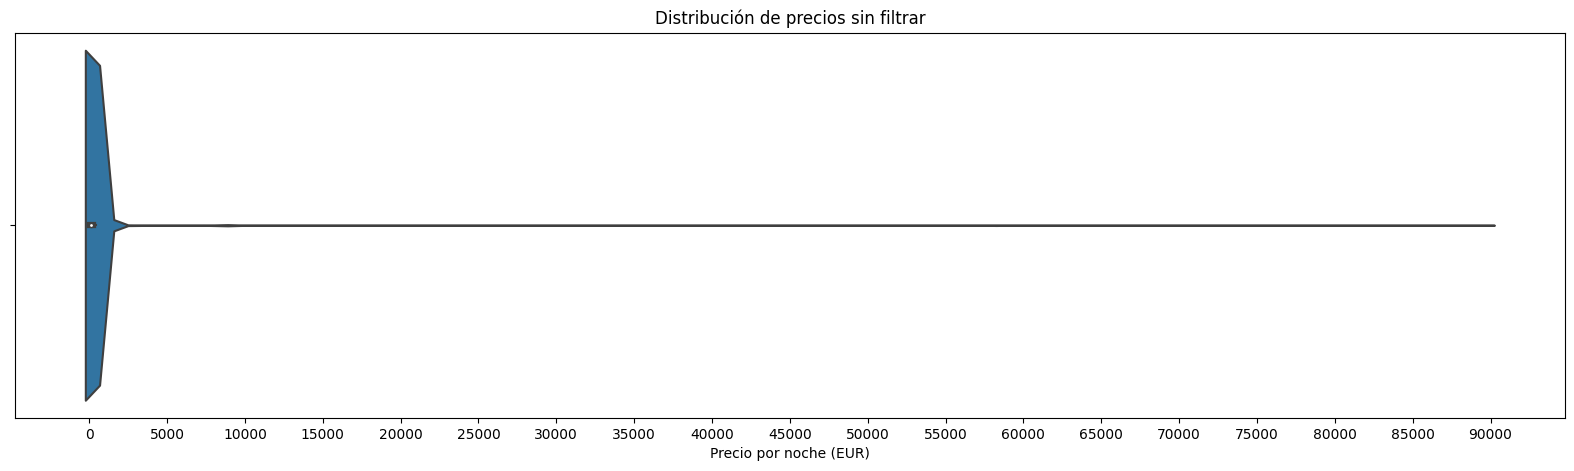

In [442]:
# Se crea un diagrama de violin para observar la ditribución de los preciuos, ver donde se ubica la media y si hay outliers que afecten.
plt.figure(figsize=(20, 5))
sns.violinplot(data=df_listings_Barcelona,x="price_float")
plt.locator_params(nbins=25)
plt.title("Distribución de precios sin filtrar")
plt.xlabel("Precio por noche (EUR)")
plt.plot()

In [443]:
# Creamos una función que nos permita remover los outliers que se observaron en el violin plot anterior. En este caso filtraremos utilizando la tecnica de IQR
def remover_outliers_superiores(df, columna):
  q1=df[columna].quantile(0.25)
  q3=df[columna].quantile(0.75)
  iqr=q3-q1
  tope_superior=q3+1.5*iqr

  nuevo_df=df.loc[df[columna]<=tope_superior][columna]

  return nuevo_df

[]

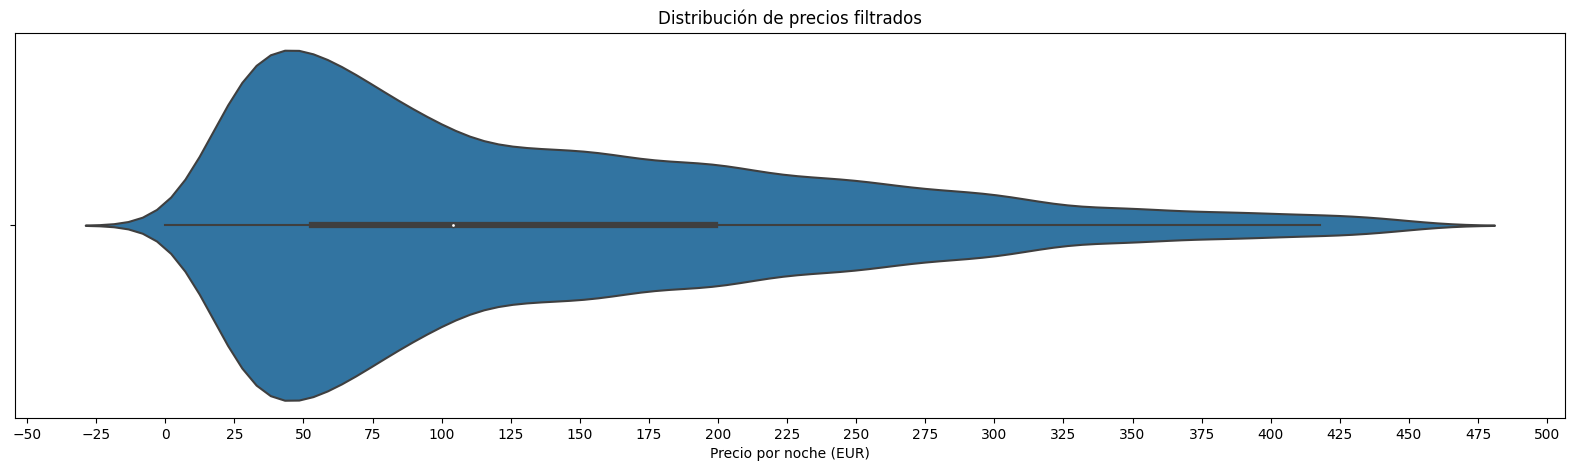

In [444]:
#Creamos una copia del dataset original para realizar el filtrado.
df_outlier_price_filtrado=df_listings_Barcelona.copy()
df_outlier_price_filtrado['price_float']=remover_outliers_superiores(df_outlier_price_filtrado,"price_float")

#Se crea nuevamente la figura de violinpara observar de manera adecuada la distribución de los precios sin los outliers
# En este caso no modificamos el dataset completo ya que para el análisis de más adelante esos valores outliers pueden ser relevantes
plt.figure(figsize=(20, 5))
sns.violinplot(data=df_outlier_price_filtrado,x="price_float")
plt.locator_params(nbins=25)
plt.title("Distribución de precios filtrados")
plt.xlabel("Precio por noche (EUR)")
plt.plot()

#### **Análisis univariable del atirbuto "neighbourhood_cleansed"**

In [445]:
#Se crea un listado con todos los barrios de la ciudad
barrios_barcelona=df_listings_Barcelona['neighbourhood_cleansed'].unique()
print(barrios_barcelona)

['la Sagrada Família' 'el Besòs i el Maresme'
 "el Camp d'en Grassot i Gràcia Nova"
 'Sant Pere, Santa Caterina i la Ribera' 'el Barri Gòtic' 'la Barceloneta'
 "la Dreta de l'Eixample" 'Vallcarca i els Penitents' 'el Raval'
 'Sant Antoni' 'el Fort Pienc' 'el Poblenou'
 'la Vila Olímpica del Poblenou' 'Vallvidrera, el Tibidabo i les Planes'
 'Sants' 'el Clot' 'el Poble Sec' 'la Vila de Gràcia'
 'la Font de la Guatlla' "la Nova Esquerra de l'Eixample"
 'Diagonal Mar i el Front Marítim del Poblenou' 'Pedralbes' 'el Guinardó'
 "l'Antiga Esquerra de l'Eixample" 'el Coll' 'Sant Gervasi - Galvany'
 'el Putxet i el Farró' 'Sant Martí de Provençals' 'Navas'
 "el Camp de l'Arpa del Clot" 'Sarrià' 'el Parc i la Llacuna del Poblenou'
 'Sants - Badal' 'el Baix Guinardó' 'el Congrés i els Indians'
 'Torre Baró' 'la Prosperitat' 'el Turó de la Peira'
 'Provençals del Poblenou' "la Font d'en Fargues" 'la Bordeta'
 'Hostafrancs' 'la Maternitat i Sant Ramon' 'les Corts' 'la Salut'
 'el Carmel' 'Sant Ger

In [446]:
# Se realiza un listado con la cantidad exacta de alojamientos disponibles en cada barrio
df_listings_Barcelona['neighbourhood_cleansed'].value_counts()

la Dreta de l'Eixample                          2213
el Raval                                        1379
el Barri Gòtic                                  1228
Sant Pere, Santa Caterina i la Ribera           1118
la Vila de Gràcia                                997
l'Antiga Esquerra de l'Eixample                  989
la Sagrada Família                               985
Sant Antoni                                      864
el Poble Sec                                     805
la Nova Esquerra de l'Eixample                   705
el Fort Pienc                                    488
Sant Gervasi - Galvany                           430
la Barceloneta                                   403
el Poblenou                                      398
Sants                                            330
el Camp d'en Grassot i Gràcia Nova               300
el Camp de l'Arpa del Clot                       296
Hostafrancs                                      216
les Corts                                     

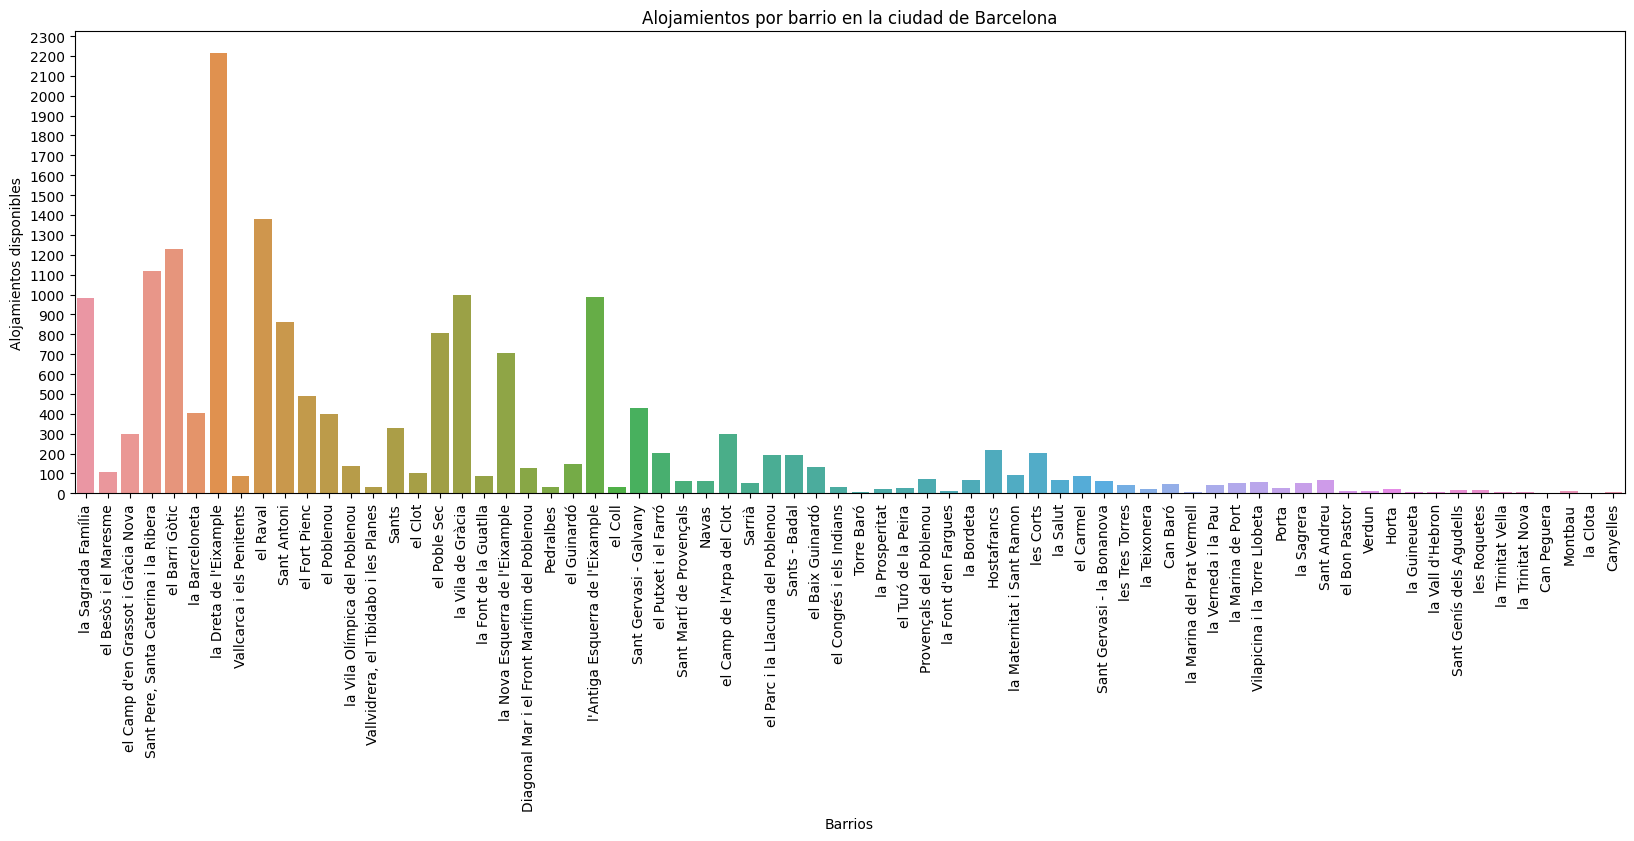

In [447]:
# Creamos un gráfico que permita visualizar el listado anterior de mejor manera
plt.figure(figsize=(20, 6))
sns.countplot(x='neighbourhood_cleansed',data=df_listings_Barcelona)
plt.xticks(rotation=90)
plt.locator_params(axis='y',nbins=25)
plt.title("Alojamientos por barrio en la ciudad de Barcelona")
plt.xlabel("Barrios")
plt.ylabel("Alojamientos disponibles")
plt.show()

#### **Análisis univariable del atirbuto "room_type"**

In [448]:
# Se crea un listado donde se observe la cantidad de alojamientos de cada tipo que hay en la ciudad de Barcelona
df_listings_Barcelona['room_type'].value_counts()

Entire home/apt    10262
Private room        6675
Shared room          150
Hotel room           143
Name: room_type, dtype: int64

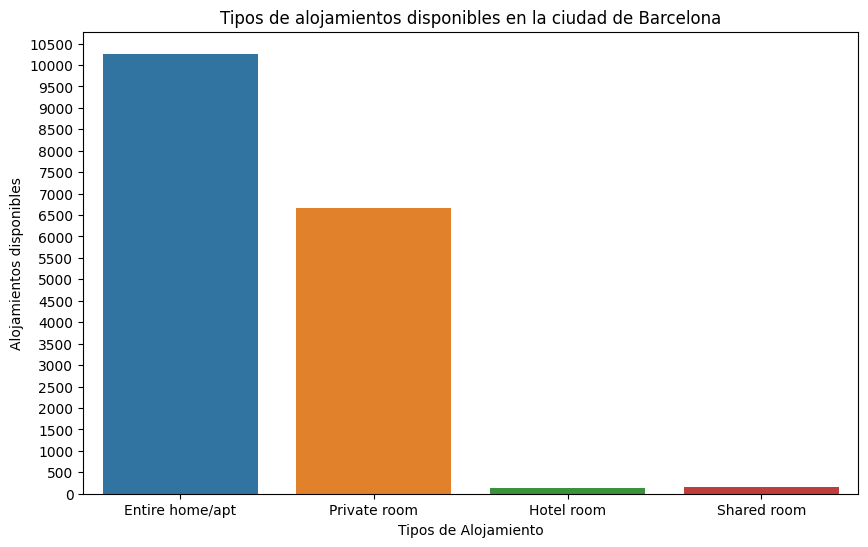

In [449]:
#Creamos un gráfico que permita ver de mejor forma la tabla anterior
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type',data=df_listings_Barcelona)
plt.locator_params(axis='y',nbins=25)
plt.title("Tipos de alojamientos disponibles en la ciudad de Barcelona")
plt.xlabel("Tipos de Alojamiento")
plt.ylabel("Alojamientos disponibles")
plt.show()

#### **Análisis univariable del atirbuto "accommodates"**

In [450]:
df_listings_Barcelona['accommodates'].describe()

count    17230.000000
mean         3.409460
std          2.145476
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

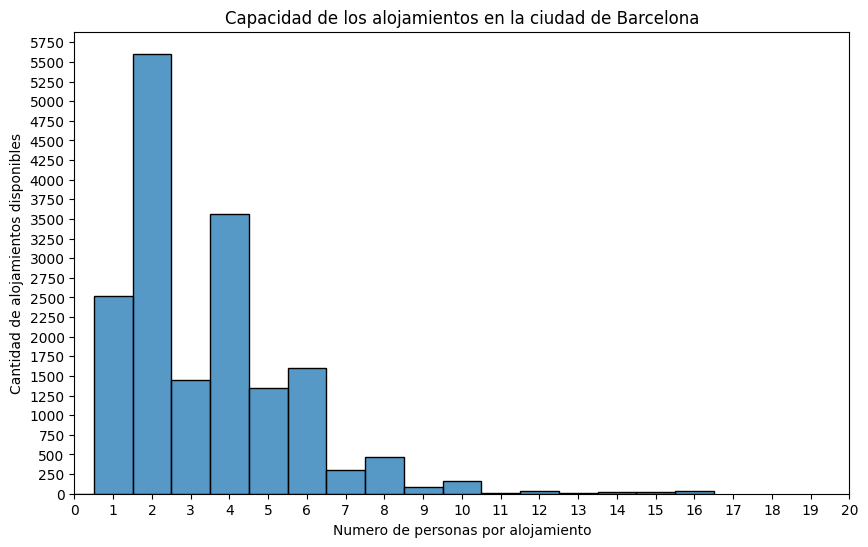

In [451]:

plt.figure(figsize=(10, 6))
sns.histplot(x='accommodates',data=df_listings_Barcelona,discrete=True);
plt.locator_params(nbins=25)
plt.title("Capacidad de los alojamientos en la ciudad de Barcelona")
plt.ylabel("Cantidad de alojamientos disponibles")
plt.xlim(0,20)
plt.xlabel("Numero de personas por alojamiento")
plt.show()

## **Estrategia de análisis**
---


El objetivo de este proyecto es brindar información para la decisión de invertir en el sector inmobiliario de la ciudad de Barcelona y alquilar los inmuebles adquiridos en la plataforma Airbnb

Inicialmente la estrategia que se adopta consta de dos etapas iniciales. La primera etapa consiste en identificar el promedio de cantidad de reseñas que tienen los alojamientos de cada barrio, graficarlos y crear una lista con el top 10 de los barrios con más reseñas. Luego miraremos la distribuciuón de precios promedio de los alojamientos en cada barrio, se graficarán y luego se creará un top 10 de los barrios con mejores precios promedio. Con estas dos listas identificadas se filtrarán los barrrios que se encuentren en las dos listas y así se obtendrán los barrios que la gente más visita y con el mejor precio


La segunda etapa se encarga de mostrar la información de los alojamientos en cada barrio. En este caso las variables claves a analizar son el precio, cantidad de personas por alojamiento y su tipo (Entire place, Private rooms, Hotel rooms, Shared rooms). El objetivo es crear un dashboard que permita identificar por cada barrio el número de cada tipo de alojamientos que hay, el promedio de personas que cada tipo de alojamiento tiene y el precio promedio de cada uno de estos. De esta manera el inversionista obtendrá la información de en qué barrio buscar viviendas, qué tipo de vivienda buscar, para cuantas personas tendría que adaptar el sitio y el precio esperado que le permita crear un flujo de caja para calcular el retorno esperado según su elección.





## **Desarrollo de la estrategia**
---

### **Análisis de barrios y reseñas**

In [453]:
#Creamos una lista que contenga todos los barrios e Barcelona
listado_barrios=list(set(df_listings_Barcelona['neighbourhood_cleansed'].tolist()))


In [454]:
# Filtramos el dataframe original para contener unicamente los barrios y las reseñas de cada barrio
df_resenas=df_listings_Barcelona.loc[df_listings_Barcelona['neighbourhood_cleansed'].isin(listado_barrios),['neighbourhood_cleansed','number_of_reviews']]



In [455]:
# Organizamos el datframe anterior para obtener el promedio de reseñas de alojamientos que hay por barrio
tabla_reviews=df_resenas.groupby('neighbourhood_cleansed').mean().sort_values(by='number_of_reviews',ascending=False)


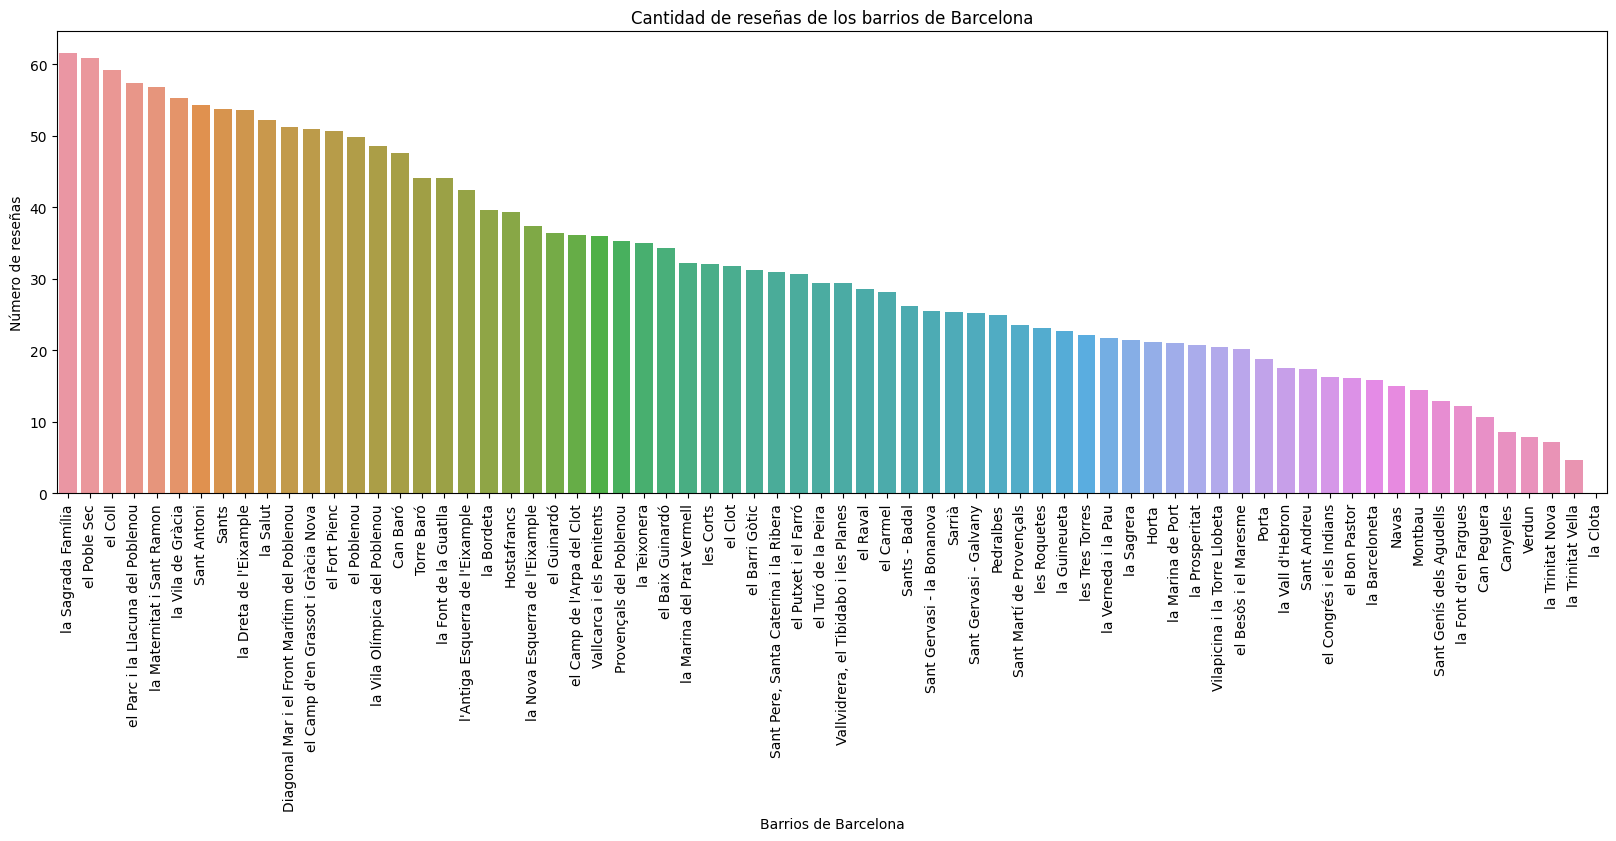

In [456]:
#Creamos uina gráfica que ilustra los barrios con más reseñas de mayor a menor
plt.figure(figsize=(20, 6))
sns.barplot(y='number_of_reviews',x=tabla_reviews.index,data=tabla_reviews)
plt.title('Cantidad de reseñas de los barrios de Barcelona')
plt.xlabel('Barrios de Barcelona')
plt.ylabel('Número de reseñas')
plt.xticks(rotation=90)
plt.show()

In [457]:
#Creamos un listado con el top 10 de barrios con más reseñas
top_10_resenas=tabla_reviews.head(10).index.tolist()
top_10_resenas

['la Sagrada Família',
 'el Poble Sec',
 'el Coll',
 'el Parc i la Llacuna del Poblenou',
 'la Maternitat i Sant Ramon',
 'la Vila de Gràcia',
 'Sant Antoni',
 'Sants',
 "la Dreta de l'Eixample",
 'la Salut']

### **Análisis de barrios y precios**


In [458]:
# Filtramos el dataframe original para obtener un dataframe ocn el barrio y el precio de cada alojamiento
df_precios_promedio_barrios=df_listings_Barcelona.loc[df_listings_Barcelona['neighbourhood_cleansed'].isin(listado_barrios),['neighbourhood_cleansed','price_float']]


[]

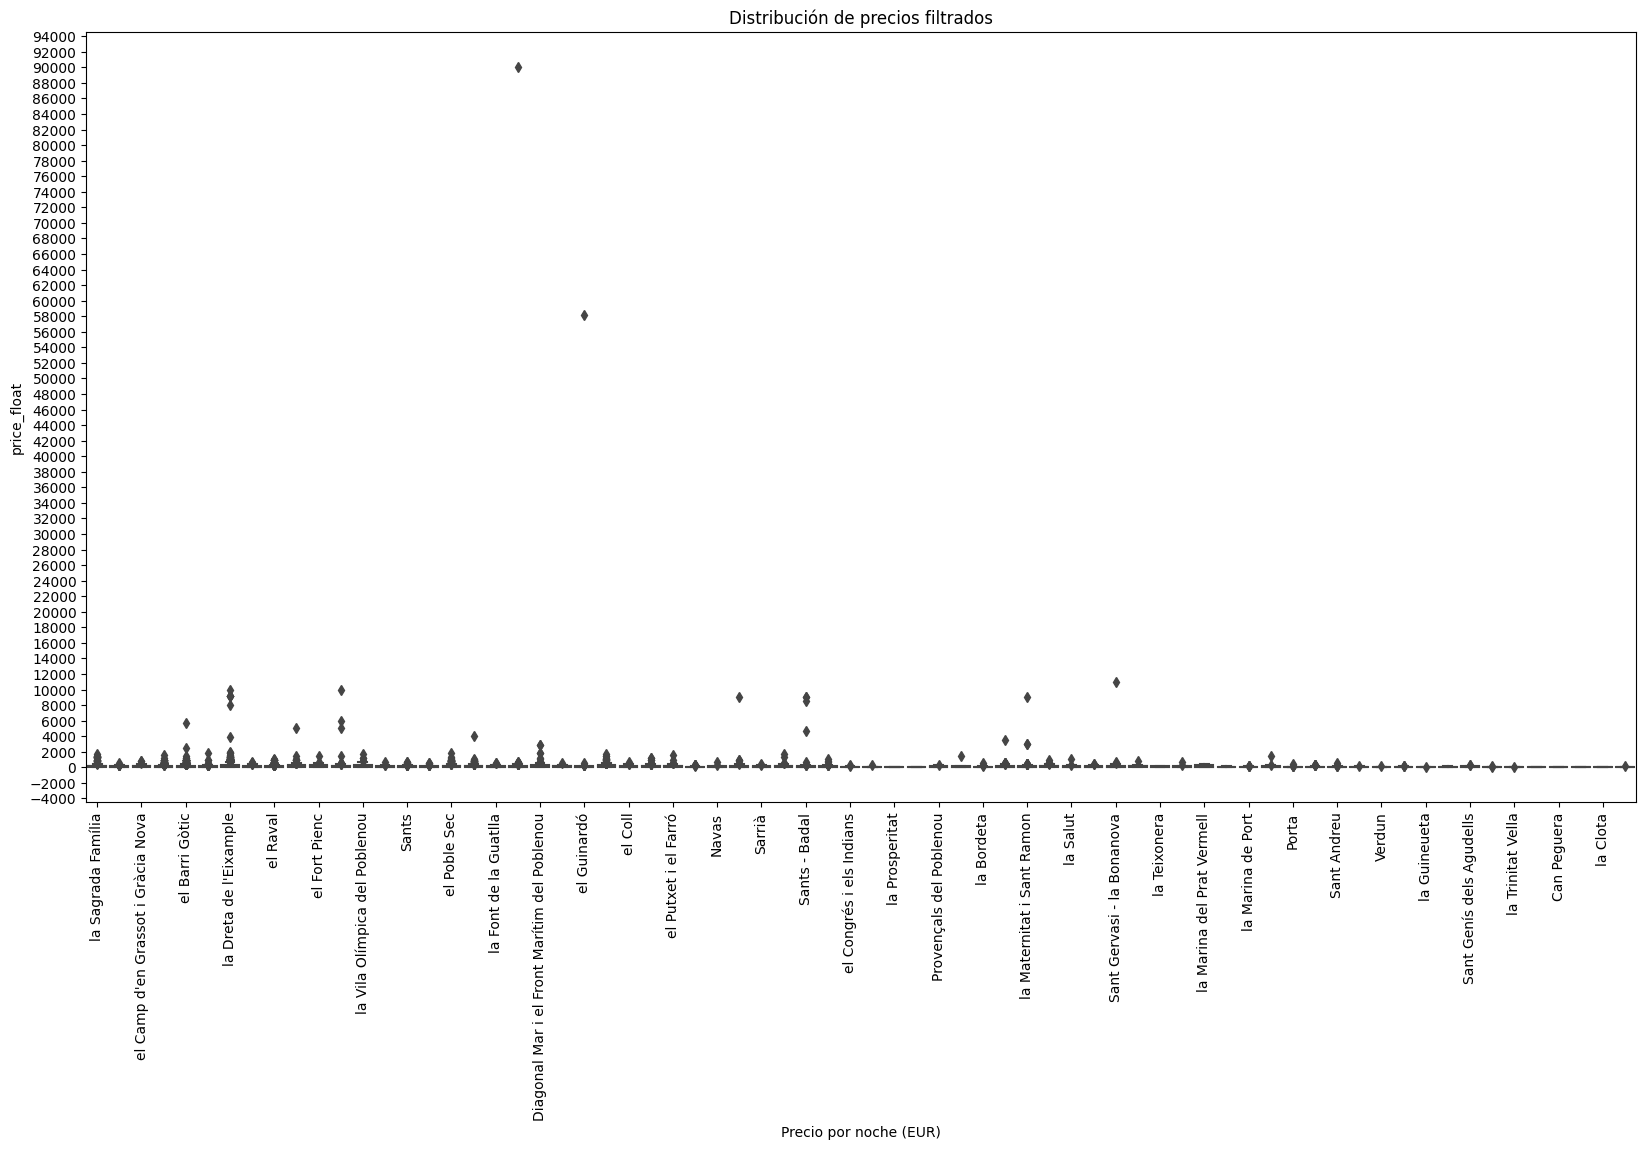

In [459]:

# Creamos un diagrama de cajas que nos permita ver la distribución de los precios en cada barrio
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_precios_promedio_barrios, y='price_float', x='neighbourhood_cleansed')
plt.locator_params(nbins=50)
plt.title("Distribución de precios filtrados")
plt.xticks(rotation=90)
plt.xlabel("Precio por noche (EUR)")
plt.plot()

In [460]:
#Como en el diagrama anterior encontramos 2 valores outliers que no permitían observar de manera detallada los resultados del diagrama de cajas los filtramos con el siguiente código utilizando la función creada al inicio
df_precios_promedio_barrios_filtrados=df_precios_promedio_barrios.copy()
df_precios_promedio_barrios_filtrados['price_float']=remover_outliers_superiores(df_precios_promedio_barrios_filtrados,"price_float")


[]

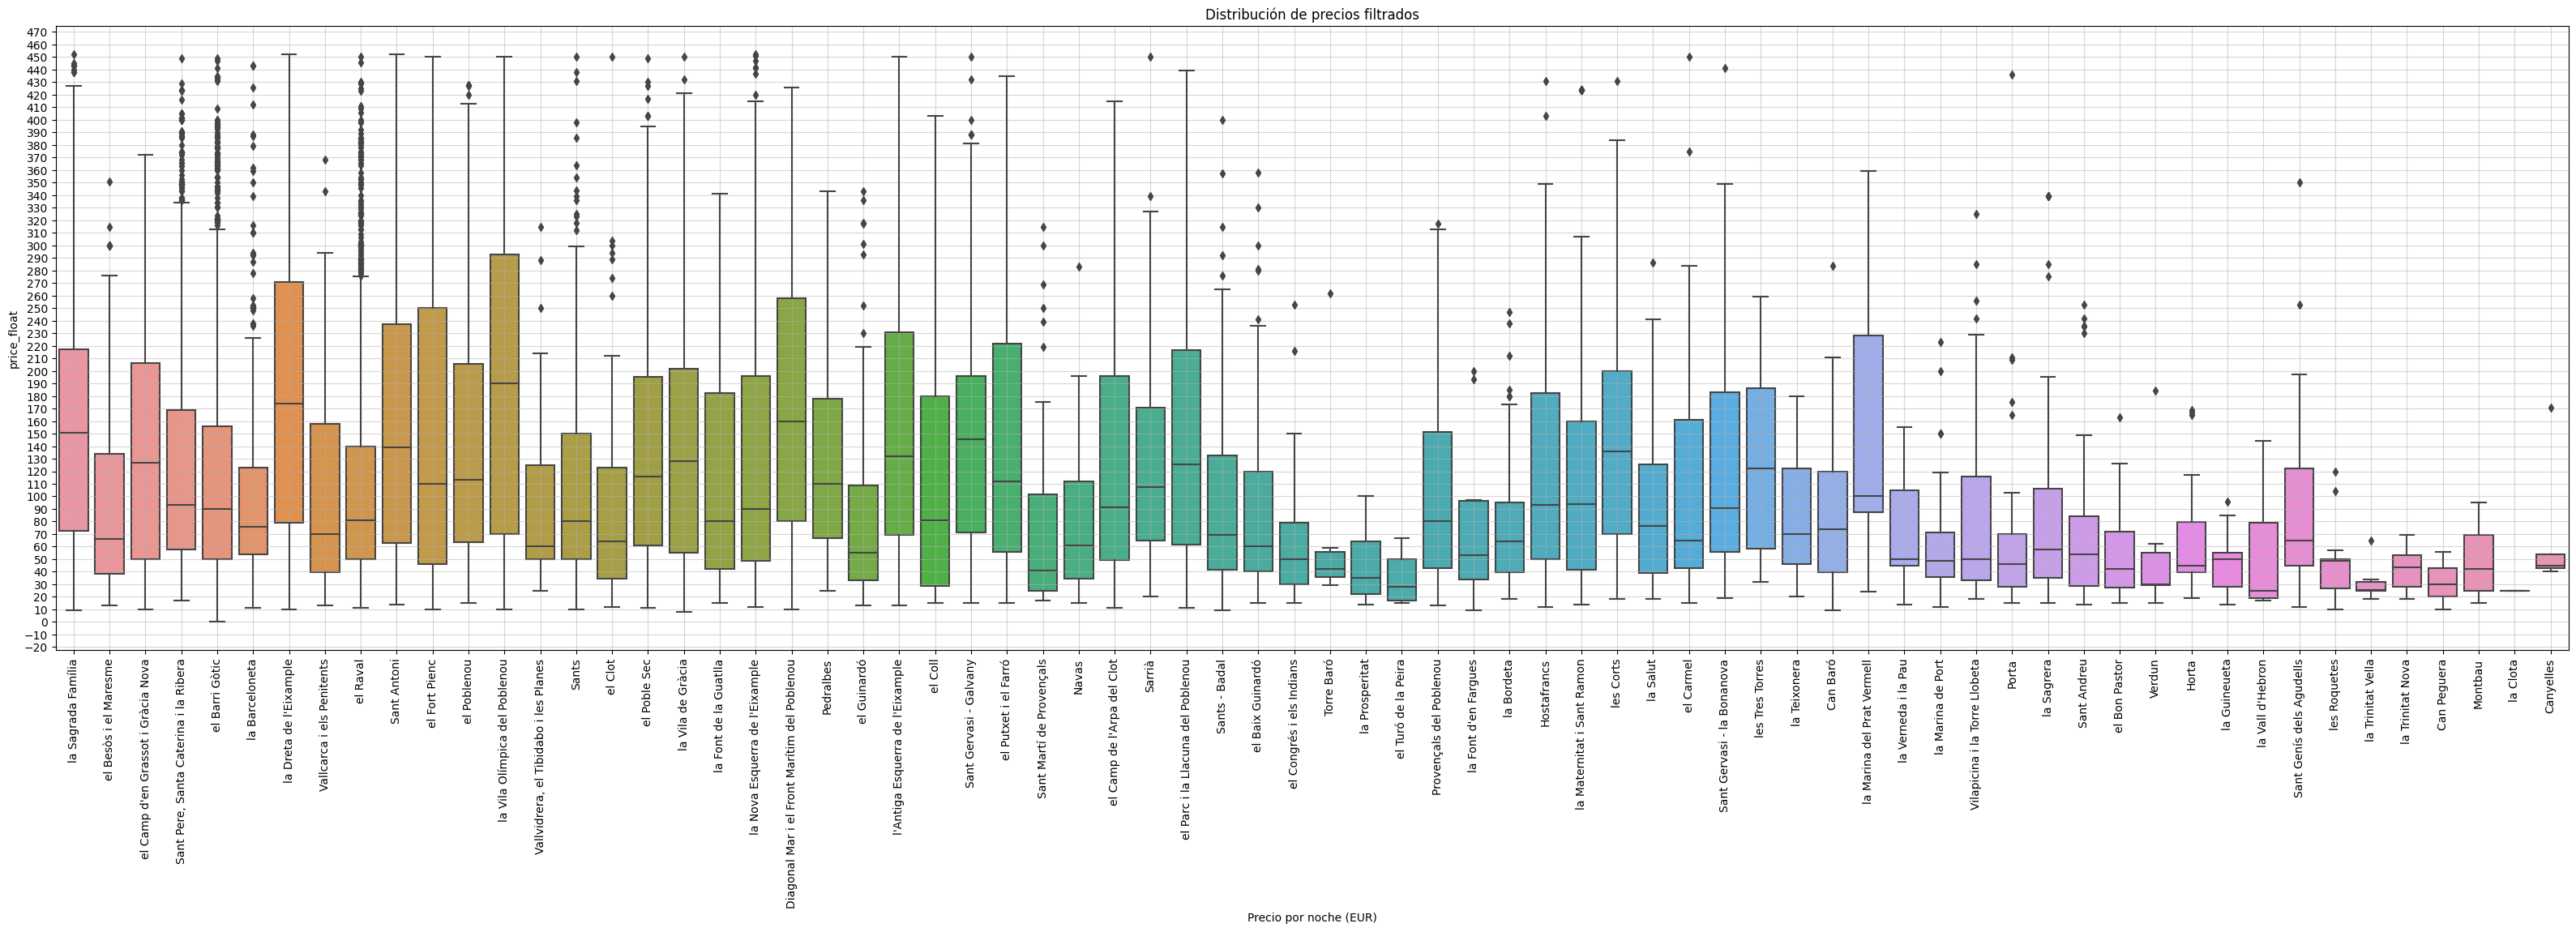

In [461]:
#Nuevamente creamos el diagrama de cajas una vez se filtraron los dos valores outliers
plt.figure(figsize=(40, 10))
sns.boxplot(data=df_precios_promedio_barrios_filtrados, y='price_float', x='neighbourhood_cleansed')
plt.locator_params(axis='y',nbins=50)
plt.title("Distribución de precios filtrados")
plt.xlabel("Precio por noche (EUR)")
plt.xticks(rotation=90)
plt.grid(True,alpha=0.5)
plt.plot()

In [462]:
# creamos una tabla donde se organicen de mayor a menor los precios promedio de cada barrio
tabla_precio=df_precios_promedio_barrios_filtrados.groupby('neighbourhood_cleansed').mean().sort_values(by='price_float',ascending=False)

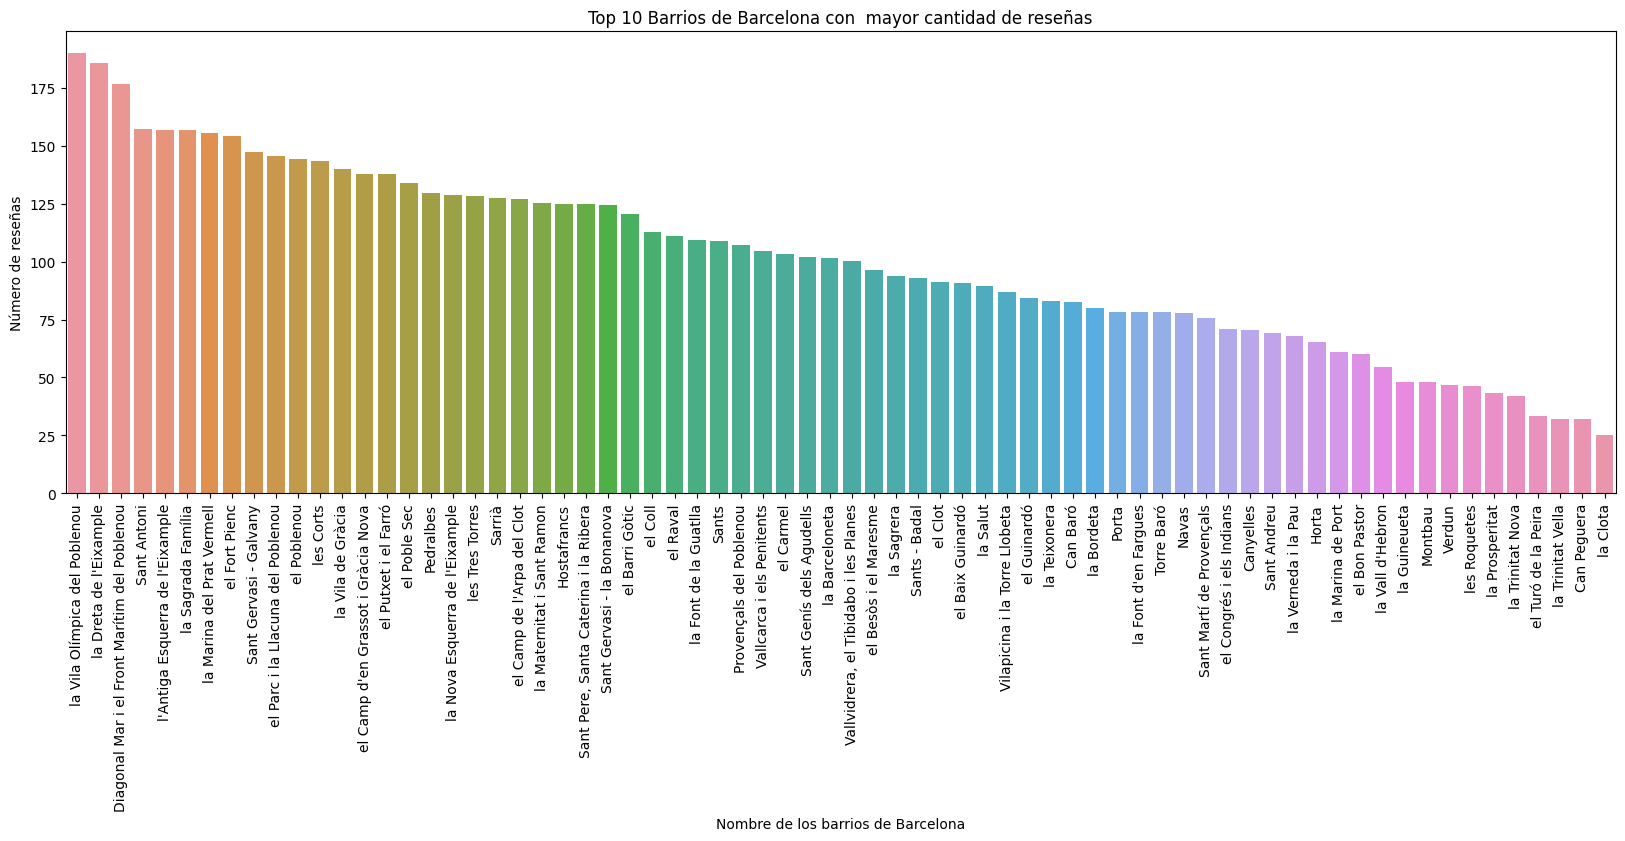

In [463]:
#creamos un gráfico que permita observar el precio promedio de cada barrio
plt.figure(figsize=(20, 6))
sns.barplot(y='price_float',x=tabla_precio.index,data=tabla_precio)
plt.title('Top 10 Barrios de Barcelona con  mayor cantidad de reseñas')
plt.xlabel('Nombre de los barrios de Barcelona')
plt.ylabel('Número de reseñas')
plt.xticks(rotation=90)
plt.show()



In [464]:
#Creamos un listado con el top 10 de barrios con mejor promedio de precio
top_10_tabla_precio=tabla_precio.head(10).index.tolist()
top_10_tabla_precio

['la Vila Olímpica del Poblenou',
 "la Dreta de l'Eixample",
 'Diagonal Mar i el Front Marítim del Poblenou',
 'Sant Antoni',
 "l'Antiga Esquerra de l'Eixample",
 'la Sagrada Família',
 'la Marina del Prat Vermell',
 'el Fort Pienc',
 'Sant Gervasi - Galvany',
 'el Parc i la Llacuna del Poblenou']

### **Selección de los mejores barrios**

In [465]:
#Creamos una lista en donde se encuentren los barrios que estén tanto en el top 10 de precios como en el top 10 de barrios con más reseñas

lista_mejores_barrios = list(set(top_10_tabla_precio) & set(top_10_resenas))

print(f"Los mejores barrios para invertir son:{lista_mejores_barrios}")

Los mejores barrios para invertir son:["la Dreta de l'Eixample", 'el Parc i la Llacuna del Poblenou', 'Sant Antoni', 'la Sagrada Família']


### **Descripción de los mejores alojamientos**

#### **la Sagrada Família**

In [466]:
#filtramos el dataset para obtener unicamente el tipo de cuarto, cantidad de huespedes y precio del alojamiento por barrio
df_sagrada_familia=df_listings_Barcelona.loc[df_listings_Barcelona['neighbourhood_cleansed']=='la Sagrada Família',['room_type','accommodates','price_float']]


In [467]:
#generamos una tabla donde se observe la cantidad de alojamientos por tipo y su respectivo precio promedio
resultado= df_sagrada_familia.groupby('room_type')['price_float'].agg(['count', 'mean']).reset_index()
resultado=resultado.rename(columns={'count':'Cantidad'})
resultado=resultado.rename(columns={'mean':'Precio promedio'})
print(f'A continuación podrá observar el reporte de los alojamientos que hay en este barrio:\n {resultado}')

A continuación podrá observar el reporte de los alojamientos que hay en este barrio:
          room_type  Cantidad  Precio promedio
0  Entire home/apt       719       230.393602
1       Hotel room         6       179.000000
2     Private room       255        58.376471
3      Shared room         5        41.400000


In [468]:
# Obtenemos la capacidad promedio de huespedes que tienen los alojamientos en este barrio
huespedes_promedio=df_sagrada_familia['accommodates'].mean()
print(f'El promedio de capacidad de huespedes por alojamiento es de: {huespedes_promedio_sagrada_familia.round()}')

El promedio de capacidad de huespedes por alojamiento es de: 4.0


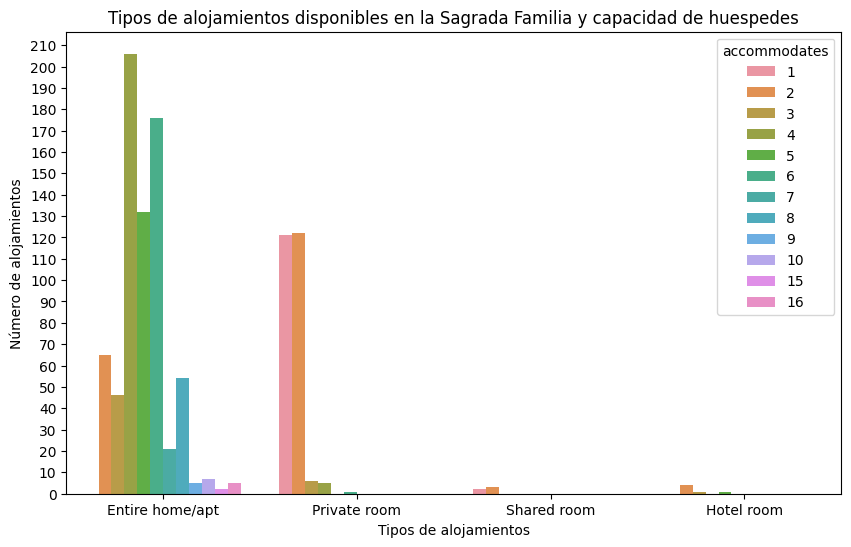

In [469]:
# Creamos una gráfica donde se observe la cantidad de huespedes por tipo de alojamiento que hay en este barrio
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type',data=df_sagrada_familia, hue='accommodates')
plt.locator_params(axis='y',nbins=25)
plt.title("Tipos de alojamientos disponibles en la Sagrada Familia y capacidad de huespedes")
plt.xlabel("Tipos de alojamientos")
plt.ylabel("Número de alojamientos")
plt.show()

#### **Sant Antoni**

In [470]:
#filtramos el dataset para obtener unicamente el tipo de cuarto, cantidad de huespedes y precio del alojamiento por barrio
df_antoni=df_listings_Barcelona.loc[df_listings_Barcelona['neighbourhood_cleansed']=='Sant Antoni',['room_type','accommodates','price_float']]

In [471]:
#generamos una tabla donde se observe la cantidad de alojamientos por tipo y su respectivo precio promedio
resultado= df_antoni.groupby('room_type')['price_float'].agg(['count', 'mean']).reset_index()
resultado=resultado.rename(columns={'count':'Cantidad'})
resultado=resultado.rename(columns={'mean':'Precio promedio'})
print(f'A continuación podrá observar el reporte de los alojamientos que hay en este barrio:\n {resultado}')

A continuación podrá observar el reporte de los alojamientos que hay en este barrio:
          room_type  Cantidad  Precio promedio
0  Entire home/apt       516       234.106589
1       Hotel room        15       222.066667
2     Private room       333        90.891892


In [472]:
# Obtenemos la capacidad promedio de huespedes que tienen los alojamientos en este barrio
huespedes_promedio=df_antoni['accommodates'].mean()
print(f'El promedio de capacidad de huespedes por alojamiento es de: {huespedes_promedio.round()}')

El promedio de capacidad de huespedes por alojamiento es de: 4.0


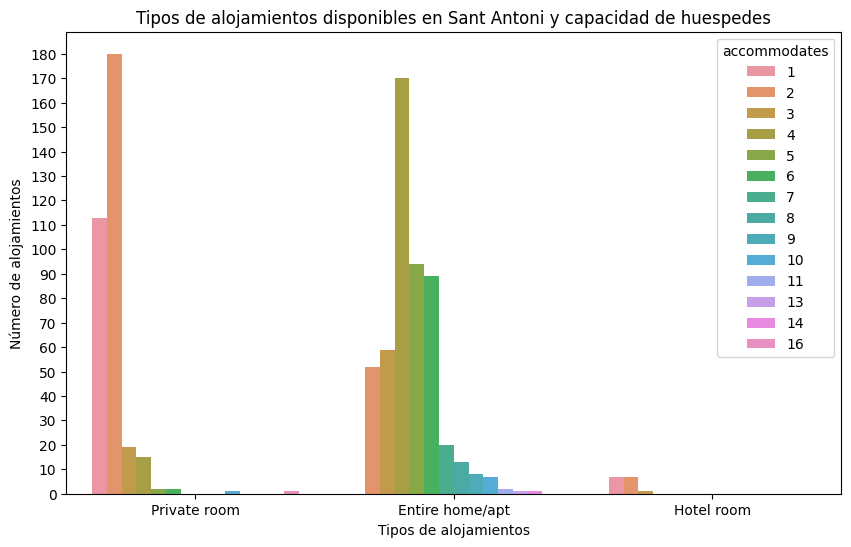

In [473]:
# Creamos una gráfica donde se observe la cantidad de huespedes por tipo de alojamiento que hay en este barrio
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type',data=df_antoni, hue='accommodates')
plt.locator_params(axis='y',nbins=25)
plt.title("Tipos de alojamientos disponibles en Sant Antoni y capacidad de huespedes")
plt.xlabel("Tipos de alojamientos")
plt.ylabel("Número de alojamientos")
plt.show()

#### **el Parc i la Llacuna del Poblenou**

In [474]:
#filtramos el dataset para obtener unicamente el tipo de cuarto, cantidad de huespedes y precio del alojamiento por barrio
df_parc=df_listings_Barcelona.loc[df_listings_Barcelona['neighbourhood_cleansed']=='el Parc i la Llacuna del Poblenou',['room_type','accommodates','price_float']]

In [475]:
#generamos una tabla donde se observe la cantidad de alojamientos por tipo y su respectivo precio promedio
resultado= df_parc.groupby('room_type')['price_float'].agg(['count', 'mean']).reset_index()
resultado=resultado.rename(columns={'count':'Cantidad'})
resultado=resultado.rename(columns={'mean':'Precio promedio'})
print(f'A continuación podrá observar el reporte de los alojamientos que hay en este barrio:\n {resultado}')

A continuación podrá observar el reporte de los alojamientos que hay en este barrio:
          room_type  Cantidad  Precio promedio
0  Entire home/apt       111       218.396396
1       Hotel room         3       283.666667
2     Private room        75        77.546667
3      Shared room         3       175.000000


In [476]:
# Obtenemos la capacidad promedio de huespedes que tienen los alojamientos en este barrio
huespedes_promedio=df_parc['accommodates'].mean()
print(f'El promedio de capacidad de huespedes por alojamiento es de: {huespedes_promedio.round()}')

El promedio de capacidad de huespedes por alojamiento es de: 3.0


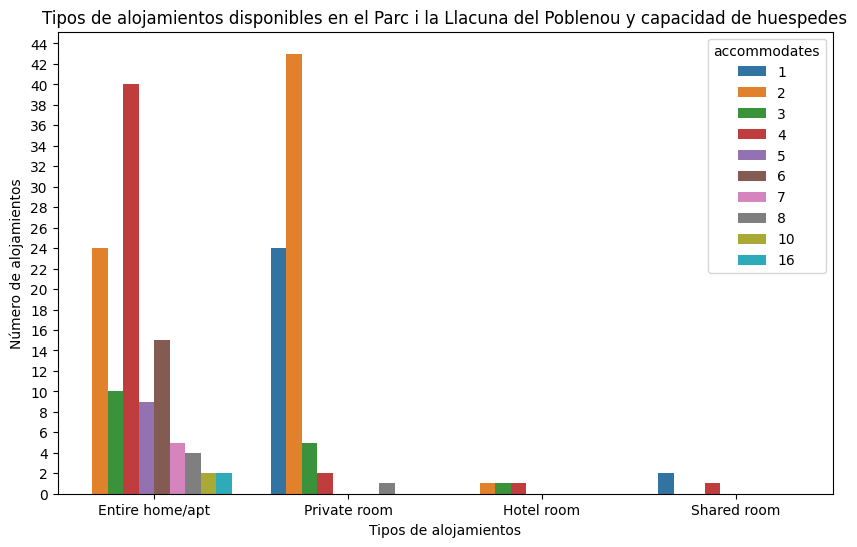

In [477]:
# Creamos una gráfica donde se observe la cantidad de huespedes por tipo de alojamiento que hay en este barrio
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type',data=df_parc, hue='accommodates')
plt.locator_params(axis='y',nbins=25)
plt.title("Tipos de alojamientos disponibles en el Parc i la Llacuna del Poblenou y capacidad de huespedes")
plt.xlabel("Tipos de alojamientos")
plt.ylabel("Número de alojamientos")
plt.show()

#### **la Dreta de l'Eixample**

```
# Tiene formato de código
```



In [478]:
#filtramos el dataset para obtener unicamente el tipo de cuarto, cantidad de huespedes y precio del alojamiento por barrio
df_dreta=df_listings_Barcelona.loc[df_listings_Barcelona['neighbourhood_cleansed']=="la Dreta de l'Eixample",['room_type','accommodates','price_float']]

In [479]:
#generamos una tabla donde se observe la cantidad de alojamientos por tipo y su respectivo precio promedio
resultado= df_dreta.groupby('room_type')['price_float'].agg(['count', 'mean']).reset_index()
resultado=resultado.rename(columns={'count':'Cantidad'})
resultado=resultado.rename(columns={'mean':'Precio promedio'})
print(f'A continuación podrá observar el reporte de los alojamientos que hay en este barrio:\n {resultado}')

A continuación podrá observar el reporte de los alojamientos que hay en este barrio:
          room_type  Cantidad  Precio promedio
0  Entire home/apt      1424       313.738062
1       Hotel room        41       329.341463
2     Private room       712       182.907303
3      Shared room        36        86.111111


In [480]:
# Obtenemos la capacidad promedio de huespedes que tienen los alojamientos en este barrio
huespedes_promedio=df_dreta['accommodates'].mean()
print(f'El promedio de capacidad de huespedes por alojamiento es de: {huespedes_promedio.round()}')

El promedio de capacidad de huespedes por alojamiento es de: 4.0


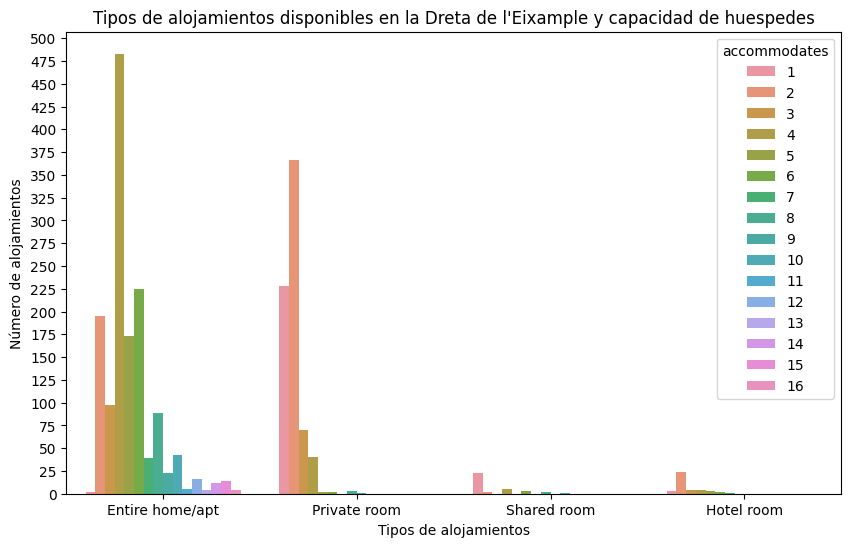

In [481]:
# Creamos una gráfica donde se observe la cantidad de huespedes por tipo de alojamiento que hay en este barrio
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type',data=df_dreta, hue='accommodates')
plt.locator_params(axis='y',nbins=25)
plt.title("Tipos de alojamientos disponibles en la Dreta de l'Eixample y capacidad de huespedes")
plt.xlabel("Tipos de alojamientos")
plt.ylabel("Número de alojamientos")
plt.show()